In [1]:
###  Simple Linear Regression 2
#### Q-2 Salary Hike

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

In [7]:
salary = pd.read_csv("C:/Users/Tejal/Desktop/AS4 SLR/Salary_Data (1).csv")

In [8]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary.shape

(30, 2)

C:\Users\Tejal\AppData\Local\Temp\ipykernel_5292\2240156110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

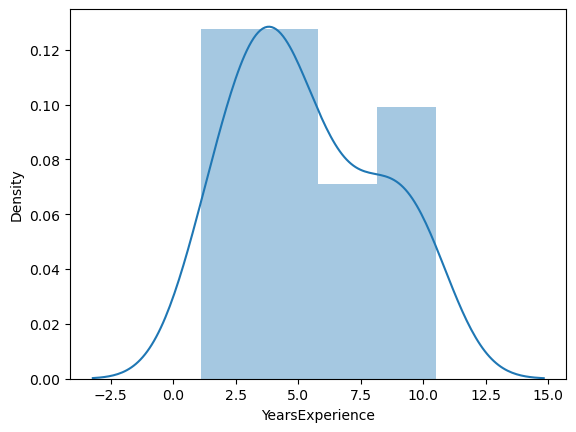

In [15]:
sns.distplot(salary['YearsExperience'])

C:\Users\Tejal\AppData\Local\Temp\ipykernel_5292\708293685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

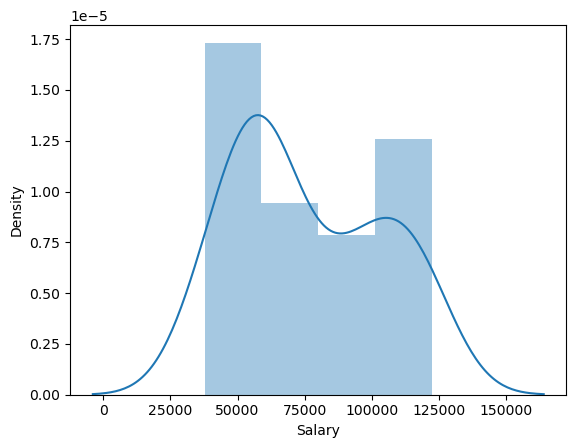

In [16]:
sns.distplot(salary['Salary'])

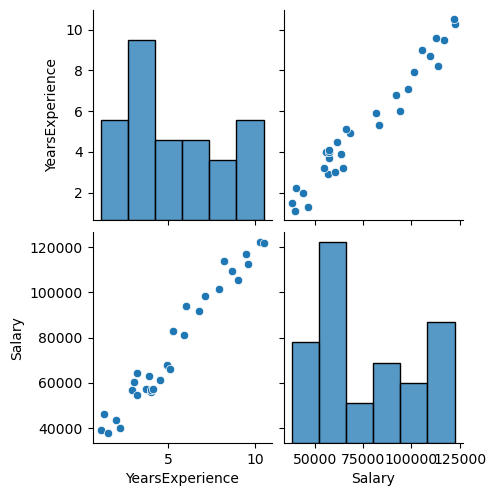

In [18]:
sns.pairplot(salary)

In [19]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

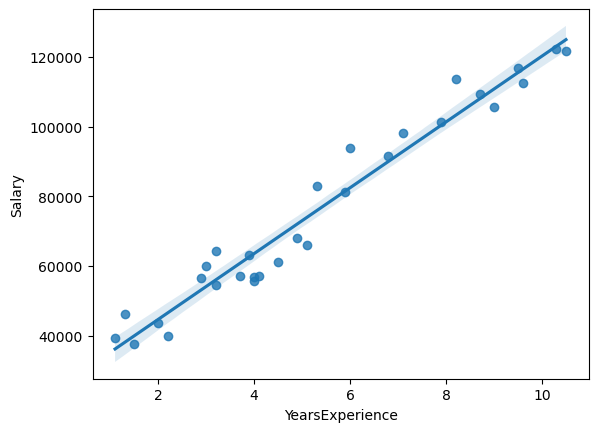

In [24]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])


In [ ]:
### Model Building 

In [25]:
model = smf.ols("Salary~YearsExperience",data=salary).fit()

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [28]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [29]:
model.rsquared

0.9569566641435086

In [30]:
model.rsquared_adj

0.9554194021486339

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        00:49:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
####prediction 

In [42]:
newdata = pd.Series([7,15,20])

In [43]:
data_pred = pd.DataFrame(newdata,columns=['YearsExperience'])

In [44]:
data_pred

,YearsExperience
0,7
1,15
2,20


In [45]:
model.predict(data_pred)

0     91941.936449
1    167541.635020
2    214791.446628
dtype: float64

In [46]:
salary['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [47]:
model.predict(salary['YearsExperience'])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [48]:
salary['predicted'] = model.predict(salary["YearsExperience"])

In [49]:
salary

,YearsExperience,Salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
